##Modeling Competitive Binding

We will model binding of two ligands, one is fluorescent (L), the other competing ligand (A) is not. Kd of both of their binding to protein (P) are known. 

Complex concentration and fluorescence of the complex are assumed to be directly related.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import display, Math, Latex #Do we even need this anymore?
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Strictly Competitive Binding Model

In [2]:
# I must add a figure here.

$$L + P \underset{k_dL}{\stackrel{k_L}{\rightleftharpoons}} PL$$

$$A + P \underset{k_dA}{\stackrel{k_A}{\rightleftharpoons}} PA$$

### Modelling the competition experiment - Expected Binding Curve
P: protein (HSA)

L: tracer ligand (dansyl amide), 

A: non-fluorescent ligand (phenylbutazone)

In [3]:
# Dissociation constant for fluorescent ligand L: K_dL (uM)
Kd_L = 15

Ideally protein concentration should be 10 fold lower then Kd. It must be at least hafl of Kd if fluorescence detection requires higher protein concentration.

For our assay it will be 0.5 uM.

In [4]:
# Total protein (uM)
Ptot = 0.5

Ideally ligand concentation should span 100-fold Kd to 0.01-fold Kd, log dilution.

The ligand concentration will be in half log dilution from 20 uM ligand.

In [5]:
num_wells = 12.0
# (uM)
Lmax = 2000
Lmin = 0.02
# Factor for logarithmic dilution (n)
# Lmax*((1/n)^(11)) = Lmin for 12 wells
n = (Lmax/Lmin)**(1/(num_wells-1))

# Ligand titration series (uM)
Ltot = Lmax / np.array([n**(float(i)) for i in range(12)])
Ltot

array([  2.00000000e+03,   7.02238347e+02,   2.46569348e+02,
         8.65752256e+01,   3.03982217e+01,   1.06733985e+01,
         3.74763485e+00,   1.31586645e+00,   4.62025940e-01,
         1.62226166e-01,   5.69607174e-02,   2.00000000e-02])

In [6]:
# Dissociation constant for non-fluorescent ligand A: K_dA (uM)
Kd_A = 3.85

In [7]:
# Constant concentration of A will be added to all wells (uM)
Atot= 50

For the assumption that free $[A] = A_{tot}$, it is required that $[A] >> [P]$.
Ligand depletion can cause additional shift of $ K_{dL,app}$

---

If competitive ligand is not present ($[A] = A_{tot} = 0$). Wel can calculate [PL] as a function of Ptot, Ltot, and Kd as follows:

$$[PL] = \frac{[L][P]}{K_{d} }$$

Then we need to put L and P in terms of Ltot and Ptot, using

$$[L] = [Ltot]-[PL]$$

$$[P] = [Ptot]-[PL]$$

This gives us:

$$[PL] = \frac{([Ltot]-[PL])([Ptot]-[PL])}{K_{d} }$$

Solving this for 0 you get:

$$0 = [PL]^2 - [PL]([Ptot]+[Ltot]+K_{d}) + [Ptot][Ltot]$$

Using the quadratic equation:

$$x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$$

where x is $[PL]$, a is 1, $-([Ptot]+[Ltot]+Kd)$ is b, and $[Ptot][Ltot]$ is c. We get as the only reasonable solution:

$$[PL] = \frac{([Ptot] + [Ltot] + K_{d}) - \sqrt{([Ptot] + [Ltot] + K_{d})^2 - 4[Ptot][Ltot]}}{2}$$ 

In the presence of non-zero concentration of A -a strictly competitive ligand for the same binding site- titration curve will be shifted. Half maximum saturation point gives us apparent dissociation constant for L ( $K_{dL,app}$). This shift is dependent of $[A]$ and $K_{dA}$.

$$K_{dL,app} = K_{dL}(1+\frac{[A]}{K_{dA}})$$ 

$$[PL] = \frac{([Ptot] + [Ltot] + K_{dL,app}) - \sqrt{([Ptot] + [Ltot] + K_{dL,app})^2 - 4[Ptot][Ltot]}}{2}$$ 

In [8]:
#Competitive binding function
def three_component_competitive_binding(Ptot, Ltot, Kd_L, Atot, Kd_A):
    """
    Parameters
    ----------
    Ptot : float
        Total protein concentration
    Ltot : float
        Total tracer(fluorescent) ligand concentration
    Kd_L : float
        Dissociation constant
    Atot : float
        Total competitive ligand concentration
    Kd_A : float
        Dissociation constant
        
    Returns
    -------
    P : float
        Free protein concentration
    L : float
        Free ligand concentration
    A : float
        Free ligand concentration
    PL : float
        Complex concentration
    Kd_L_app : float
        Apparent dissociation constant of L in the presence of A
        
    Usage
    -----
    [P, L, A, PL, Kd_L_app] = three_component_competitive_binding(Ptot, Ltot, Kd_L, Atot, Kd_A)
    """
    Kd_L_app = Kd_L*(1+Atot/Kd_A)                                
    PL = 0.5 * ((Ptot + Ltot + Kd_L_app) - np.sqrt((Ptot + Ltot + Kd_L_app)**2 - 4*Ptot*Ltot))  # complex concentration (uM)
    P = Ptot - PL; # free protein concentration in sample cell after n injections (uM)                                                                                                                                                                                                                          
    L = Ltot - PL; # free tracer ligand concentration in sample cell after n injections (uM)
    A = Atot - PL; # free competitive ligand concentration in sample cell after n injections (uM)
    return [P, L, A, PL, Kd_L_app]

### Without competitive ligand

In [9]:
# If there is no competitive ligand 
Atot=0 #(uM)
[P_A0, L_A0, A_A0, PL_A0, Kd_L_app_A0] = three_component_competitive_binding(Ptot, Ltot, Kd_L, Atot, Kd_A)

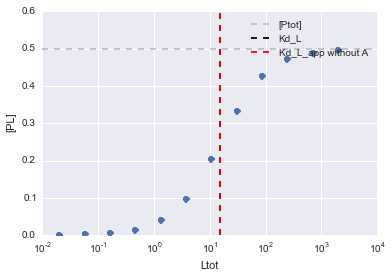

In [10]:
plt.semilogx(Ltot,PL_A0, 'o')
plt.xlabel('Ltot')
plt.ylabel('[PL]')
plt.ylim(1e-3,6e-1)
plt.axhline(Ptot,color='0.75',linestyle='--',label='[Ptot]')
plt.axvline(Kd_L,color='k',linestyle='--',label='Kd_L')
plt.axvline(Kd_L_app_A0,color='r',linestyle='--',label='Kd_L_app without A')
plt.legend()

### In the presence of 10 uM competitive ligand

In [11]:
# If we change competitor concentration 
Atot=10 #(uM)
[P_A10, L_A10, A_A10, PL_A10, Kd_L_app_A10] = three_component_competitive_binding(Ptot, Ltot, Kd_L, Atot, Kd_A)

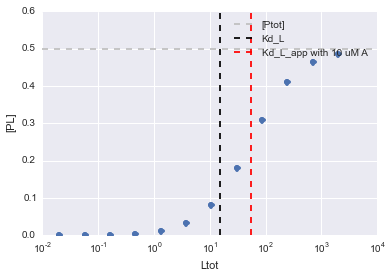

In [12]:
#plt.subplot(1,2,1)
plt.semilogx(Ltot,PL_A10, 'o')
plt.xlabel('Ltot')
plt.ylabel('[PL]')
plt.ylim(1e-3,6e-1)
plt.axhline(Ptot,color='0.75',linestyle='--',label='[Ptot]')
plt.axvline(Kd_L,color='k',linestyle='--',label='Kd_L')
plt.axvline(Kd_L_app_A10,color='r',linestyle='--',label='Kd_L_app with 10 uM A')
plt.legend()

### In the presence of 50 uM competitive ligand

In [13]:
# Competitor concentration 
Atot=50 #(uM)
[P_A50, L_A50, A_A50, PL_A50, Kd_L_app_A50] = three_component_competitive_binding(Ptot, Ltot, Kd_L, Atot, Kd_A)

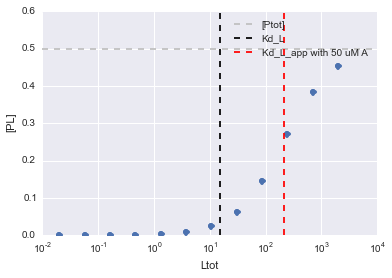

In [14]:
# Plotting complex concentration [PL] as a function of fluorescent ligand concentration Ltot¶
plt.semilogx(Ltot,PL_A50, 'o')
plt.xlabel('Ltot')
plt.ylabel('[PL]')
plt.ylim(1e-3,6e-1)
plt.axhline(Ptot,color='0.75',linestyle='--',label='[Ptot]')
plt.axvline(Kd_L,color='k',linestyle='--',label='Kd_L')
plt.axvline(Kd_L_app_A50,color='r',linestyle='--',label='Kd_L_app with 50 uM A')
plt.legend()

# Predicting experimental fluorescence signal of saturation binding experiment

Molar fluorescence values based on dansyl amide.

In [15]:
# Background fluorescence
BKG = 86.2

# Molar fluorescence of free ligand
MF = 2.5

# Molar fluorescence of ligand in complex
FR = 306.1
MFC = FR * MF

### Fluorescent ligand (L) titration into buffer

In [16]:
Ltot

array([  2.00000000e+03,   7.02238347e+02,   2.46569348e+02,
         8.65752256e+01,   3.03982217e+01,   1.06733985e+01,
         3.74763485e+00,   1.31586645e+00,   4.62025940e-01,
         1.62226166e-01,   5.69607174e-02,   2.00000000e-02])

In [17]:
# Fluorescence measurement of buffer + ligand L titrations
L=Ltot
Flu_buffer = MF*L + BKG
Flu_buffer

array([ 5086.2       ,  1841.79586711,   702.62336972,   302.63806405,
         162.19555415,   112.88349616,    95.56908711,    89.48966612,
          87.35506485,    86.60556542,    86.34240179,    86.25      ])

(50, 8000)

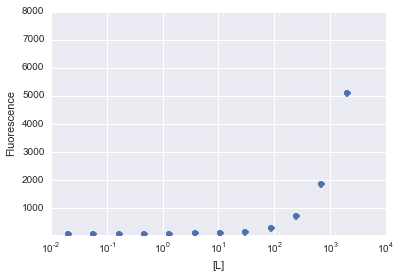

In [18]:
# y will be complex concentration
# x will be total ligand concentration
plt.semilogx(Ltot,Flu_buffer,'o')
plt.xlabel('[L]')
plt.ylabel('Fluorescence')
plt.ylim(50,8000)
#plt.legend()

### Fluorescent ligand titration into HSA (without competitive ligand)

In [19]:
Atot=0 #(uM)
[P_A0, L_A0, A_A0, PL_A0, Kd_L_app_A0] = three_component_competitive_binding(Ptot, Ltot, Kd_L, Atot, Kd_A)

In [20]:
# Free ligand concentration in each well (uM)
L=L_A0
#complex concentration
PL=PL_A0
# Fluorescence measurement of the HSA + ligand measurements
Flu_HSA = MF*L + BKG + FR*MF*PL
Flu_HSA

array([ 5464.73528075,  2215.18951449,  1062.08849907,   627.45685606,
         416.62792621,   269.63738774,   170.20461403,   119.40258614,
          98.40411325,    90.55707746,    87.73894389,    86.74148303])

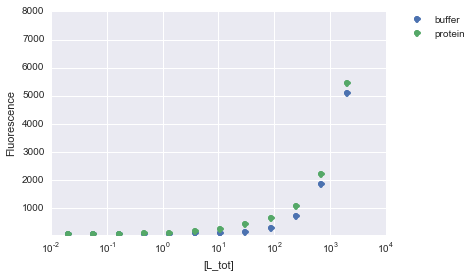

In [21]:
plt.semilogx(Ltot,Flu_buffer,'o',label='buffer')
plt.semilogx(Ltot, Flu_HSA ,'o', label='protein')
plt.xlabel('[L_tot]')
plt.ylabel('Fluorescence')
plt.ylim(50,8000)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

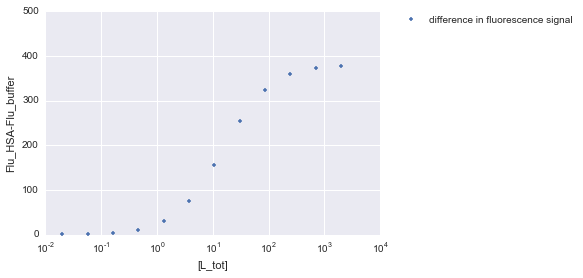

In [23]:
plt.semilogx(Ltot,(Flu_HSA-Flu_buffer),'.', label="difference in fluorescence signal")
plt.xlabel('[L_tot]')
plt.ylabel('Flu_HSA-Flu_buffer')
plt.ylim(0,500)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### Checking ligand depletion

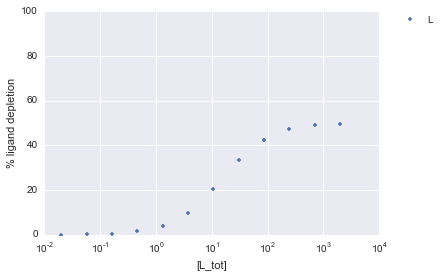

In [38]:
L_percent_depletion=(Ltot-L_A0)*100
plt.semilogx(Ltot,L_percent_depletion,'.',label='L')
plt.xlabel('[L_tot]')
plt.ylabel('% ligand depletion')
plt.ylim(0,100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Fluorescent ligand titration into HSA (with 10 uM competitive ligand)

In [25]:
Atot=10 #(uM)
[P_A10, L_A10, A_A10, PL_A10, Kd_L_app_A10] = three_component_competitive_binding(Ptot, Ltot, Kd_L, Atot, Kd_A)

In [26]:
# Free ligand concentration in each well (uM)
L=L_A10
#complex concentration
PL=PL_A10
# Fluorescence measurement of the HSA + ligand measurements
Flu_HSA = MF*L + BKG + FR*MF*PL

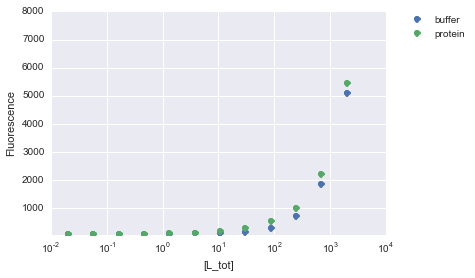

In [27]:
plt.semilogx(Ltot,Flu_buffer,'o',label='buffer')
plt.semilogx(Ltot, Flu_HSA ,'o', label='protein')
plt.xlabel('[L_tot]')
plt.ylabel('Fluorescence')
plt.ylim(50,8000)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

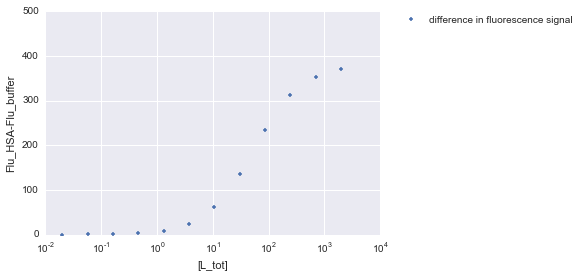

In [29]:
plt.semilogx(Ltot,(Flu_HSA-Flu_buffer),'.',label='difference in fluorescence signal')
plt.xlabel('[L_tot]')
plt.ylabel('Flu_HSA-Flu_buffer')
plt.ylim(0,500)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Fluorescent ligand titration into HSA (with 50 uM competitive ligand)

In [30]:
Atot=50 #(uM)
[P_A50, L_A50, A_A50, PL_A50, Kd_L_app_A50] = three_component_competitive_binding(Ptot, Ltot, Kd_L, Atot, Kd_A)

In [31]:
# Free ligand concentration in each well (uM)
L=L_A50
#complex concentration
PL=PL_A50
# Fluorescence measurement of the HSA + ligand measurements
Flu_HSA = MF*L + BKG + FR*MF*PL

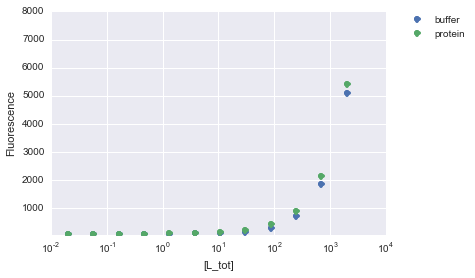

In [32]:
plt.semilogx(Ltot,Flu_buffer,'o',label='buffer')
plt.semilogx(Ltot, Flu_HSA ,'o', label='protein')
plt.xlabel('[L_tot]')
plt.ylabel('Fluorescence')
plt.ylim(50,8000)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

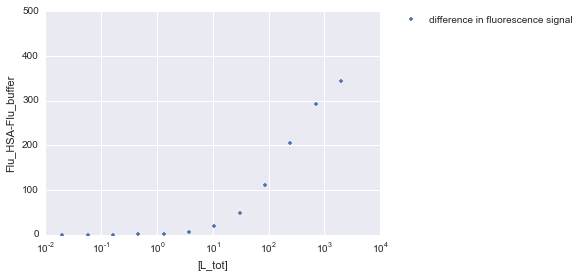

In [33]:
plt.semilogx(Ltot,(Flu_HSA-Flu_buffer),'.',label='difference in fluorescence signal')
plt.xlabel('[L_tot]')
plt.ylabel('Flu_HSA-Flu_buffer')
plt.ylim(0,500)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### Checking ligand depletion

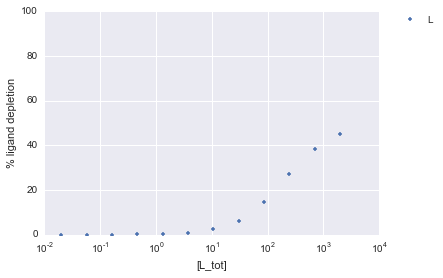

In [37]:
L_percent_depletion=(Ltot-L_A50)*100
plt.semilogx(Ltot,L_percent_depletion,'.',label='L')
plt.xlabel('[L_tot]')
plt.ylabel('% ligand depletion')
plt.ylim(0,100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)